# <3. 고양이 수염 스티커 만들기>

## 학습 목표
1. 얼굴인식 카메라의 흐름 이해
2. dlib 라이브러리 사용
3. 이미지 배열의 인덱싱 예외 처리

## 루브릭 
1. 자기만의 카메라앱 기능 구현을 완수하였다
2. 스티커 이미지를 정확한 원본 위치에 반영하였다
3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다

## 1. 필요한 모듈 import

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

#### OpenCV
- Open Source Computer Vision 의 약자
- 실시간 이미지/영상 처리에 사용하는 오픈 소스 라이브러리
- 자주 사용하는 함수들
    - 이미지 읽기 : cv2.imread()
    - 이미지 컬러 공간 변환 : cv2.cvtColor()
        - BGR 색공간을 gray-scale로 : cv2.COLOR_BGR2GRAY
        - BGR 색공간을 RGB로 : cv2.COLOR_BGR2RGB
    - 이미지 사이즈 변경: cv2.resize()
    - 이미지 보여주기: cv2.imshow()

#### dlib
- 이미지 처리, 선형대수 뿐만 아니라 다양한 머신러닝 알고리즘을 활용할 수 있는 라이브러리
- 특히 HOG(Histogram of Oriented Gradients) 특성을 사용하여 얼굴 검출하는 기능이 많이 사용된다
    - HOG
        - 이미지에서 색상의 변화량을 나타낸 것.
        - 픽셀값의 변화로 파악할 수 있는 영상 밝기 변화의 방향을 그래디언트(gradient)로 표현하고, 이로부터 객체의 형태를 찾아낼 수 있다. 

---

## 2. 사진 준비하기

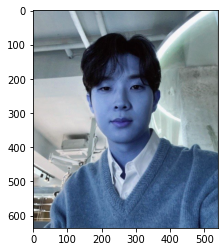

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/a.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러온다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관한다
plt.imshow(img_bgr)
plt.show()

#### 사진에 푸른빛이 감도는 이유
- matplotlib, dlib 등의 이미지 라이브러리는 모두 이미지 채널을 RGB(빨강, 녹색, 파랑) 순으로 사용
- 그러나 opencv는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용한다
- 색깔 보정처리 필요

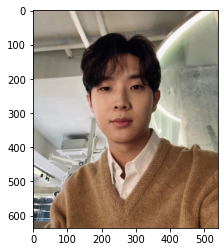

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

#### cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
- img_bgr이미지를 BGR에서 RGB로 컬러 공간을 변환한다

---

## 3. 얼굴 검출

### dlib의 face detector
- HOG(Histogram of Oriented Gradients)와 SVM(Support Vector Machine)을 사용해서 얼굴을 찾는다
    - HOG : 이미지에서 색상의 변화량을 나타낸 것.
    - SVM : 선형 분류기. 한 이미지를 다차원 공간의 한 벡터라고 보면 여러 이미지는 여러 벡터가 될텐데 이 여러 벡터를 잘 구분짓는 방법이다. 이미지가 HOG를 통해 벡터로 만들어진다면 SVM이 잘 작동한다
    - 참고 : https://hayunjong83.tistory.com/38
- 얼굴의 위치를 찾는 방법 : sliding window
    - 작은 영역(window)을 이동해가며 확인하는 방법을 말한다. 큰 이미지의 작은 영역을 잘라 얼굴이 있는지 확인하고, 다시 작은 영역을 옆으로 옮겨 얼굴이 있는지 확인하는 방식이다. 물론 이렇게 한다면 이미지가 크면 클수록 오래걸리는 단점이 있다.
    - 참고 : https://metar.tistory.com/entry/Sliding-window%EB%8A%94-%EB%AC%B4%EC%97%87%EC%9D%BC%EA%B9%8Cobject-detection

In [4]:
# detector 선언
detector_hog = dlib.get_frontal_face_detector()

# detector_hog 를 이용해서 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) 

#### detector_hog(img_rgb, 1)
- img_rgb : bgr 이미지를 rgb로 변환한 이미지
- 1 : 이미지 피라미드의 수.
    - 이미지 피라미드 : 이미지를 upsamling방법을 통해 크기를 키우는 것을 이미지 피라미드라고 한다. 이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능하다
    - 참고 : https://opencv-python.readthedocs.io/en/latest/doc/14.imagePyramid/imagePyramid.html

rectangles[[(159, 180) (345, 366)]]


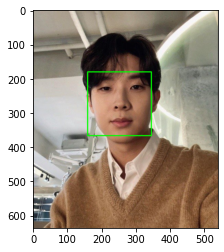

In [5]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### dlib_rects
- dlib detector 는 dlib.rectangles 타입의 객체를 반환 ( dlib_rects 에 dlib.rectangles 타입의 객체가 할당 )
- dlib.rectangles는 dlib.rectangle 객체의 배열 형태로 이루어져 있다
- dlib.rectangle객체는 left(), top(), right(), bottom(), height(), width() 등의 멤버 함수를 포함
- 그래서 dlib_rects 에서 left, top, right, bottom 을 얻는다

#### cv2.rectangle(img, pt1, pt2, color, thickness=None, lineType=None)
- 사각형을 그릴때 이용하는 함수
- pt1, pt2: 사각형의 두 꼭지점 좌표. (x, y) 튜플
- color: 선 색상 또는 밝기. (B, G, R) 튜플 또는 정수값
- thickness: 선 두께. 기본값은 1. 음수(-1)를 지정하면 내부를 채움
- lineType: 선 타입. cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택. 기본값은 cv2.LINE_8

---

## 4. 얼굴 랜드마크

### face landmark localization
- 이목구비의 위치를 추론하는 기술
- detection의 결과물인 bounding box로 잘라낸 얼굴 이미지를 이용한다
- Face landmark와 같이 객체 내부의 점을 찾는 기술을 object keypoint estimation이라고 한다
    1. top-down : bounding box를 찾고 box 내부의 keypoint를 예측
    2. bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성

### Dlib landmark localization
- 잘라진 얼굴 이미지에서 아래 68개의 이목구비 위치를 찾는다
- ibug 300w 데이터셋은 68개를 사용
    - 학습 알고리즘은 regression tree의 앙상블 모델을 사용

![Dlib에 사용 되는 랜드마크 순서](https://choiiis.github.io/assets/images/posts_img/machine-learning-1/ml-1-2.png "Dlib에 사용 되는 랜드마크 순서")

In [6]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#### dlib.shape_predictor
- 얼굴의 특징점 모듈을 초기화한다

In [7]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


#### landmark_predictor
- RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환

#### points
- dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있다
- map 함수를 이용해서 points.parts()에서 x와 y를 추출해 list_points = [(x1,y1), (x2,y2), ..... , (x68,y68)] 를 만든다
- 만들어진 list_points를 list_landmarks 리스트에 append

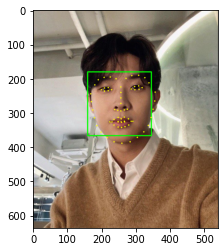

In [8]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### cv2.circle(img, center, radius, color, thickness=None, lineType=None, shift=None)
- img : 그림을 그릴 이미지
- center : 원의 중심 좌표. (x, y) 튜플
- radius : 원의 반지름
- color : 선 색상 또는 밝기. (B, G, R) 튜플 또는 정수값
- thickness : 선 두께. 기본값은 1, 음수(-1)를 지정하면 내부를 채움
- lineType : 선 타입. cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택
- shift : 그리기 좌표 값의 축소 비율. 기본값은 0

---

## 5. 스티커 적용하기
- 스티커 위치 : 코 중앙인 33에 위치하도록 설정
- top : x - w // 2
- left : y - h // 2

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) 
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(256, 294)
(x,y) : (256,294)
(w,h) : (187,187)


In [10]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(187, 187, 3)


#### img_sticker
- 고양이 수염 이미지를 불러와서 저장
- 위에서 계산한 크기로 resize

In [11]:
refined_x = x - w // 2
refined_y = y - h // 2 
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (163,201)


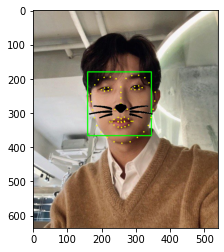

In [12]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

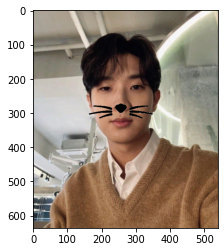

In [13]:
# bounding box, Landmark 제거
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

---

## 6. 다양한 사진에 적용시켜보기

In [14]:
def cat_sticker(img_path):
    #이미지 로드
    my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/' + img_path
    img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
    img_show = img_bgr.copy()
    
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

    #detector를 이용해 얼굴의 bounding box 추출
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1) 
    
    # 얼굴 검출
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    
    #저장한 landmark 모델 불러오기
    model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    
    
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
        
    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)    
    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)        
    
    #스티커 적용위치
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        # whiskers center index : 33
        x = landmark[33][0]
        y = landmark[33][1] 
        w =  dlib_rect.width()
        h =  dlib_rect.width()
    
    sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
    img_sticker = cv2.imread(sticker_path)   # 스티커 이미지 불러오기
    img_sticker = cv2.resize(img_sticker, (w,h))
    
    # top, left 위치 설정
    refined_x = x - w//2 
    refined_y = y - h//2   

    
    sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()

### (1)

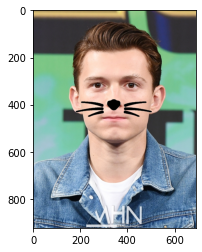

In [15]:
cat_sticker('tom.jpg')

### (2) 안경 쓴 사진도 괜찮을까?

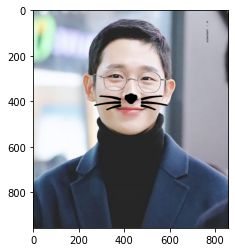

In [16]:
cat_sticker('d.jpg')

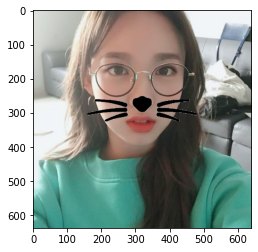

In [17]:
cat_sticker('tw.png')

- 안경쓴 사진에는 문제가 없는 것 같다

### (3) 단체 사진은?

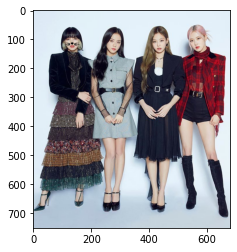

In [18]:
cat_sticker('b.jfif')

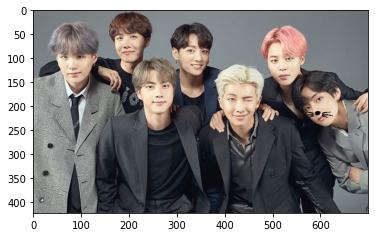

In [19]:
cat_sticker('q.jpg')

- 단체사진에서는 정확도가 많이 떨어지는 것으로 보인다

### (4) 어두운 사진은?

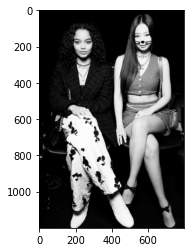

In [20]:
cat_sticker('i.jpg')

- 이목구비를 구별할 수 있을 정도의 어두움이라면 얼굴인식이 잘 되는것 같다
- 이 사진에서도 한명만 인식된 것을 알 수 있다

### (5) 각도가 다른 사진은?

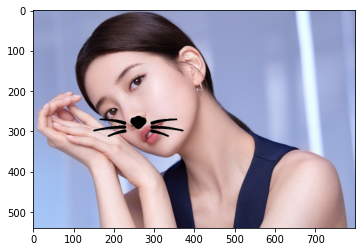

In [21]:
cat_sticker('f.jfif')

- 얼굴 각도에 맞춰서 고양이 수염 스티커도 각도가 바뀌어야 할 것 같다

### (6) 멀리서 찍은 사진은?

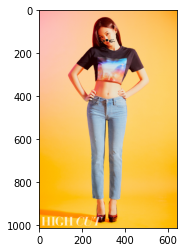

In [22]:
cat_sticker('j.jpg')

### (7) 측면 사진은?

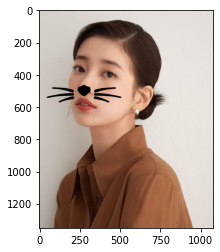

In [23]:
cat_sticker('s.jfif')

> 1. 얼굴의 회전 각도가 크면 인식을 잘 못한다
2. 얼굴이 두 개 이상일 경우 face landmark는 1개만 생성된다
3. 이목구비를 구별할 수 있는 밝기라면 인식에 문제가 되지 않는다 
    - 찾아보니 배경이 밝거나 어두운 사진은 인식이 잘되는데, 얼굴이 밝거나 어두운 사진은 인식이 잘 안된다고 한다. 이유로는 HOG 필터는 빛의 밝기의 변화도를 이용한 모델이라 얼굴 자체가 밝거나 어두우면, 빛의 밝기의 변화도가 비슷해서 이미지의 특성을 파악하기 어려워진다고 한다
4. 얼굴이 인식되는 거리의 사진이라면 문제 없는 것 같다
5. 스티커의 형태를 변형시키지 않기 때문에 얼굴 좌측과 우측 영역의 크기 차이가 심해도 스티커의 모양은 그대로이다. 그치만 얼굴의 측면이 많이 보일수록 인식되지 않는다

----

## 회고

### 1. 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?

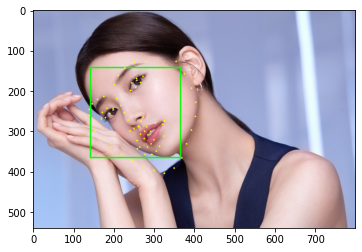

In [24]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/f.jfif'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  


detector_hog = dlib.get_frontal_face_detector()   
dlib_rects = detector_hog(img_rgb, 1)  

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [25]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) 
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(261, 288)
(x,y) : (261,288)
(w,h) : (224,224)


In [26]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(224, 224, 3)


In [27]:
# 회전 각 구하기
import math

theta = np.arctan((landmark[33][0]-landmark[27][0])/(landmark[33][1]-landmark[27][1]))
rotate_angle = theta *180/math.pi
print(rotate_angle)

38.04704253182609


(224, 224, 3)


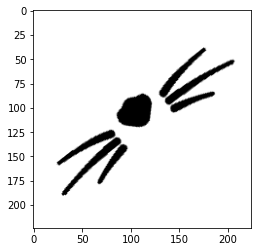

In [28]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
    return result

img_rotate = rotate_image(img_sticker,rotate_angle)
print(img_rotate.shape)
plt.imshow(img_rotate)
plt.show()

### cv2.getRotationMatrix2D(center, angle, scale)
- 중심점(center), 각도(angle), 비율(scale)로 매핑 변환 행렬(matrix)을 생성
    - 중심점(center) : 튜플(Tuple) 형태로 사용하며 회전의 기준점을 설정
    - 각도(angle) :  중심점을 기준으로 회전할 각도를 설정
    - 비율(scale) : 이미지의 확대 및 축소 비율을 설정

### cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None)
- 어파인 변환 행렬을 어파인 변환 함수에 입력해주면 이동 변환을 할 수 있다
    - src: 입력 영상
    - M: 2x3 어파인 변환 행렬. 실수형.
    - dsize: 결과 영상 크기. (w, h) 튜플. (0, 0)이면 src와 같은 크기로 설정.
    - dst: 출력 영상
    - flags: 보간법. 기본값은 cv2.INTER_LINEAR.
    - borderMode: 가장자리 픽셀 확장 방식. 기본값은 cv2.BORDER_CONSTANT.
    - borderValue: cv2.BORDER_CONSTANT일 때 사용할 상수 값. 기본값은 0(검정색)

In [29]:
refined_x = x - w // 2
refined_y = y - h // 2 
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (149,176)


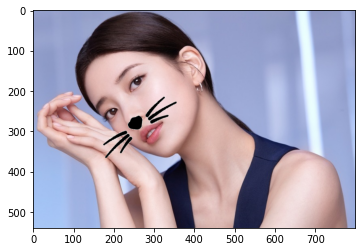

In [30]:
sticker_area = img_bgr[refined_y:refined_y +img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]]
img_bgr[refined_y:refined_y +img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]] = \
    np.where(img_rotate==255,sticker_area,img_rotate).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### * 반대쪽일때도 확인

In [31]:
def ratote_image(img_path):
        #이미지 로드
    my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/' + img_path
    img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
    img_show = img_bgr.copy()
    
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

    #detector를 이용해 얼굴의 bounding box 추출
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1) 
    
    # 얼굴 검출
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    
    #저장한 landmark 모델 불러오기
    model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    
    
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
        
    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)    
    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)        
    
    #스티커 적용위치
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        # whiskers center index : 33
        x = landmark[33][0]
        y = landmark[33][1] 
        w =  dlib_rect.width()
        h =  dlib_rect.width()
    
    sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
    img_sticker = cv2.imread(sticker_path)   # 스티커 이미지 불러오기
    img_sticker = cv2.resize(img_sticker, (w,h))
    
    #회전 각 구하기
    import math
    tan_theta = (landmark[33][0]-landmark[27][0])/(landmark[33][1]-landmark[27][1])
    theta = np.arctan(tan_theta)
    rotate_angle = theta *180/math.pi
    
    def rotate_image(image, angle):
        image_center = tuple(np.array(image.shape[1::-1]) / 2)
        rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
        result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
        return result

    img_rotate = rotate_image(img_sticker,rotate_angle)
    
    refined_x = x - w // 2
    refined_y = y - h // 2 
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
    
    sticker_area = img_bgr[refined_y:refined_y +img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]]
    img_bgr[refined_y:refined_y +img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]] = \
    np.where(img_rotate==255,sticker_area,img_rotate).astype(np.uint8)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()

(x,y) : (267,314)


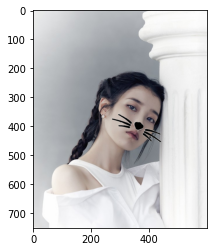

In [32]:
ratote_image('iii.jpg')

### 2. 정리
- 옆으로 누운 사진, 얼굴에 장애물이 있는 사진, 고개 회전이 많이 이루어진 사진, 얼굴이 잘 보이지 않는 사진 등 얼굴 인식부터 되지 않는 사진들이 많았다
- 이 프로젝트의 목표는 '얼마나 정확하게 구현할 수 있는지' 인것 같다.
- 스노우 등 스티커앱은 현재 많이 있는데 사진을 찍을 때 인식이 제대로 되지 않으면 그 어플을 쓸 이유가 없다. 그래서 정확도는 상당히 중요한 부분이라고 생각한다.
- 이 프로젝트를 하면서 재미를 느낄 수 있었다. 이것저것 시도해보면서 이미지 변환에 대한 다양한 개념들을 공부하게 되었는데 더 많은 예제로 시도를 해보면서 더 공부해야 할 것 같다. 
- 생각보다 고양이 스티커를 회전시키는데 시간을 많이 썼기 때문에 더 다양한 시도를 못해본게 아쉽다. 2인 이상인 사진에 대해서 제출을 한 뒤에도 시도를 해볼거다!!